In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# This one is for splitting data set
from sklearn.model_selection import train_test_split

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Libraries for different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# For hugging face space authentication to upload files
from huggingface_hub import login, HfApi

import warnings
warnings.filterwarnings("ignore")

# Read the data
kart = pd.read_csv(r"D:\VictoriaUniversity\programming for data science\SuperKart.csv") 

# Copying data to another variable to avoid changes to original data
data = kart.copy()

# Display the first 5 rows
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [5]:
data.tail() # display last five rows

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


In [6]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") # number of columns

There are 8763 rows and 12 columns.


In [7]:
data.info() # this checks the types of columns in datatset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


In [8]:
data.describe(include="all").T  #statistical summary of data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD306,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.duplicated().sum() #check duplicates

np.int64(0)

In [10]:
data.isnull().sum() #check nullls

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

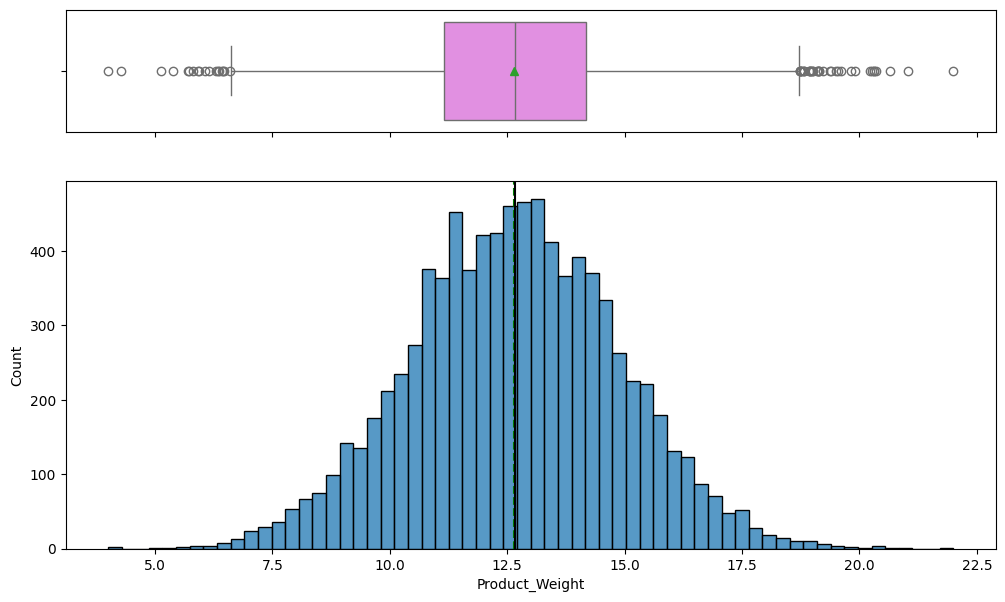

In [11]:
# explotary data analysis EDA
## function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,                      # Number of rows of the subplot grid = 2
        sharex=True,                  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    # Boxplot will be created and a star will indicate the mean value
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # For histogram
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )

    # Add mean (green dashed line) to the histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )

    # Add median (black solid line) to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )
    
histogram_boxplot(data, "Product_Weight")
    

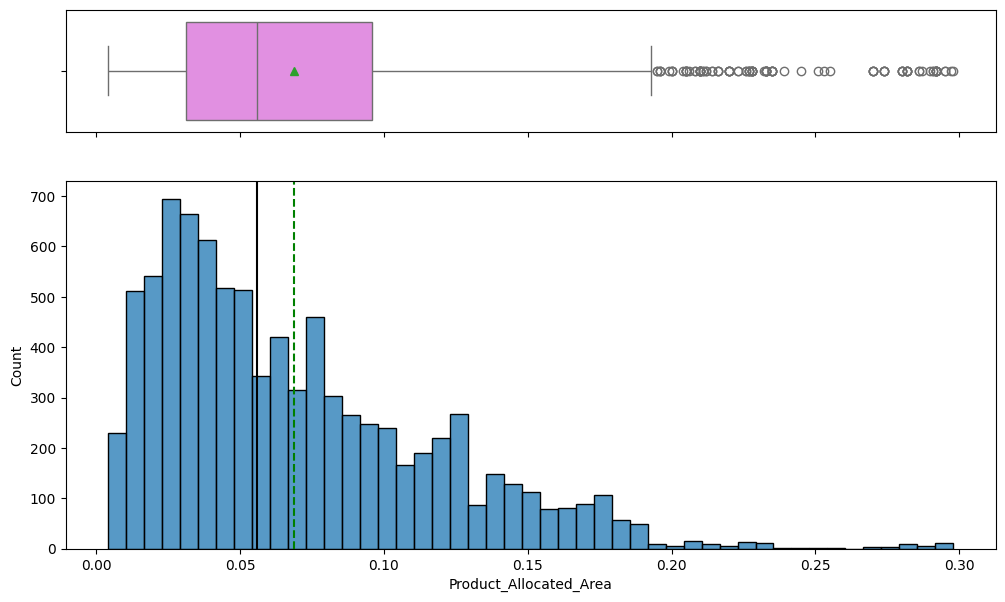

In [12]:
histogram_boxplot(data, "Product_Allocated_Area") #code to plot the boxplot and histogram of Product_Allocated_Area

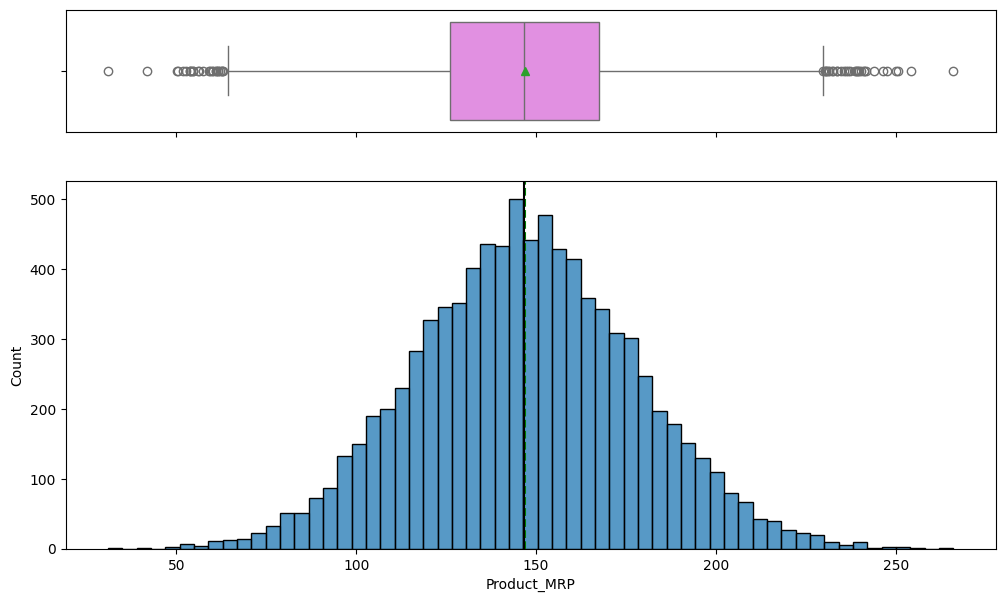

In [13]:
histogram_boxplot(data, "Product_MRP") # code to plot the boxplot and histogram of Product_MRP

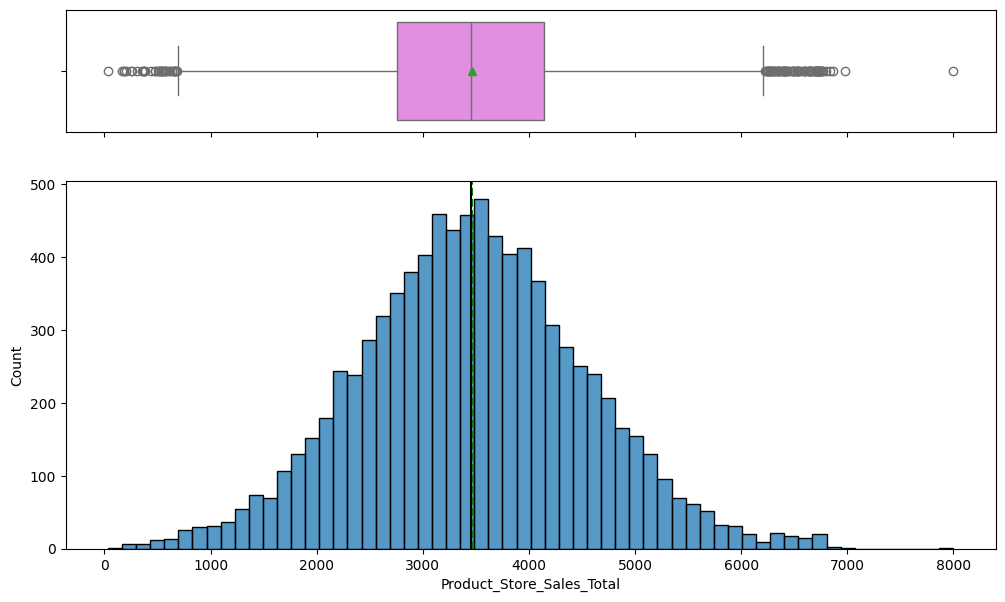

In [14]:
histogram_boxplot(data, "Product_Store_Sales_Total") #Complete the code to plot the boxplot and histogram of Product_Store_Sales_Total

In [19]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    plt.xticks(rotation=90, fontsize=15)
    
    # Create the countplot
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Annotate each bar with the count or percentage
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class
        else:
            label = int(p.get_height())  # count of each level of the category
            
        x = p.get_x() + p.get_width() / 2  # Find the horizontal center of the bar
        y = p.get_height()                # Find the top of the bar
        
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
        
    plt.show()


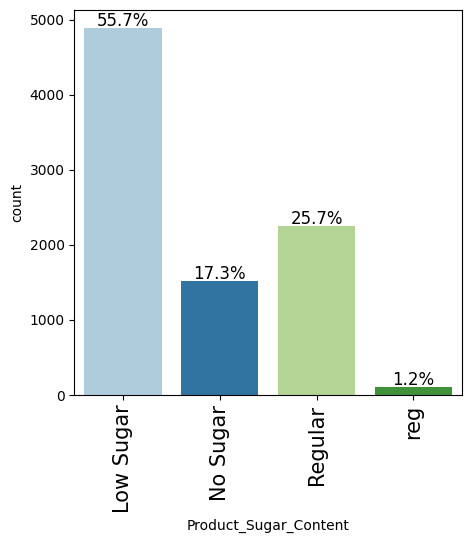

In [20]:
labeled_barplot(data,"Product_Sugar_Content", perc=True)

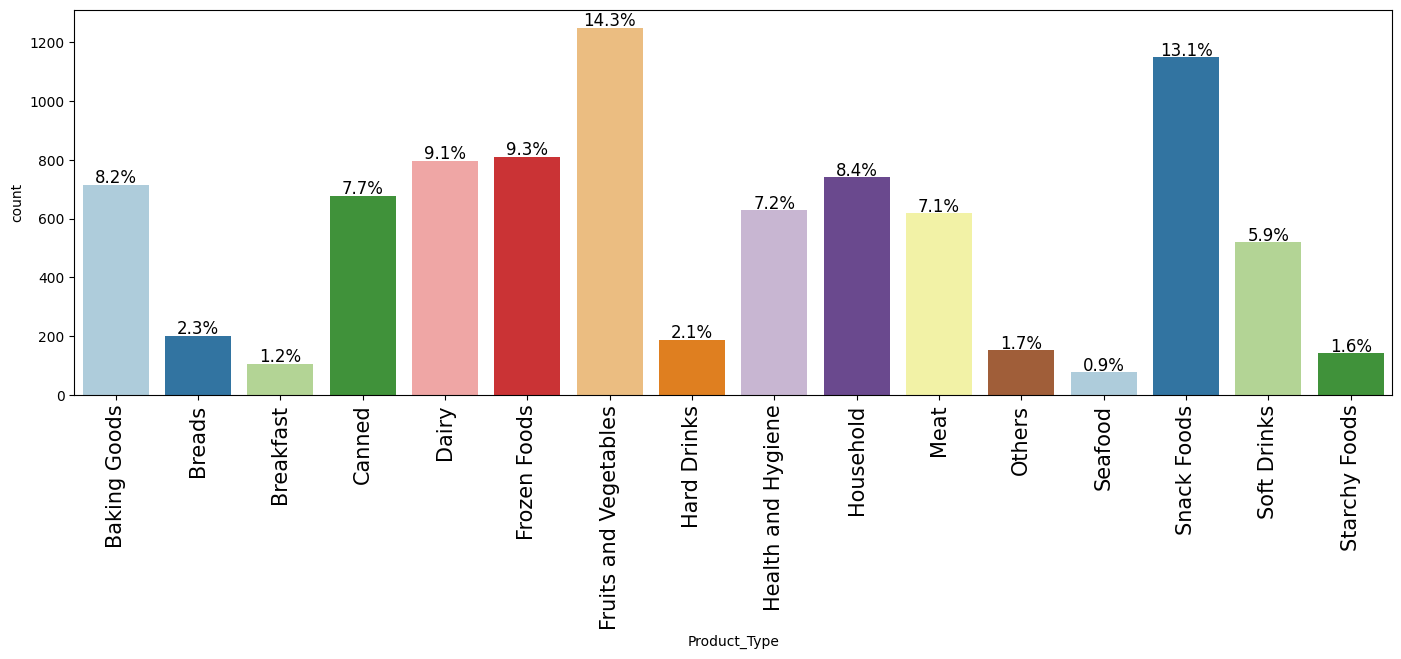

In [21]:
labeled_barplot(data, "Product_Type", perc=True) #Complete the code to plot the labelled barplot of Product_Type with the percentages being displayed

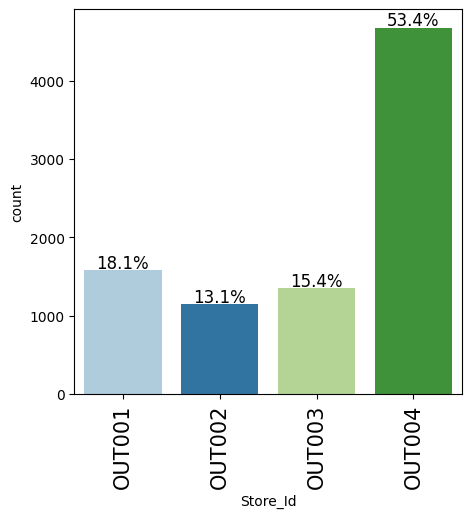

In [22]:
labeled_barplot(data, "Store_Id", perc=True) #Complete the code to plot the labelled barplot of Store_Id with the percentages being displayed

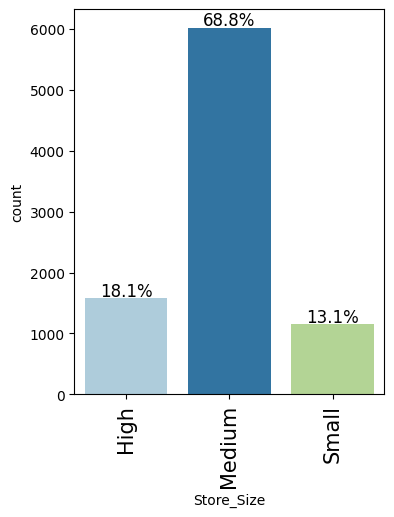

In [23]:
labeled_barplot(data, "Store_Size", perc=True) #Complete the code to plot the labelled barplot of Store_Size with the percentages being dispplayed

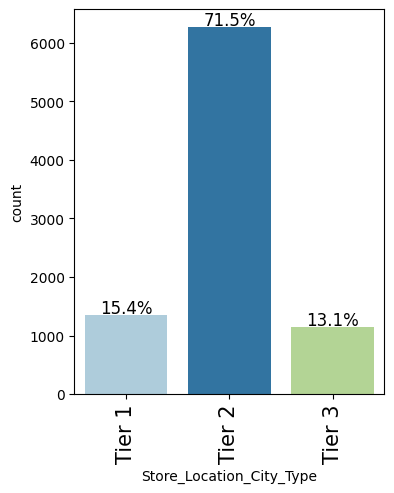

In [24]:
labeled_barplot(data, "Store_Location_City_Type", perc=True) #Complete the code to plot the labelled barplot of Store_Location_City_Type with %

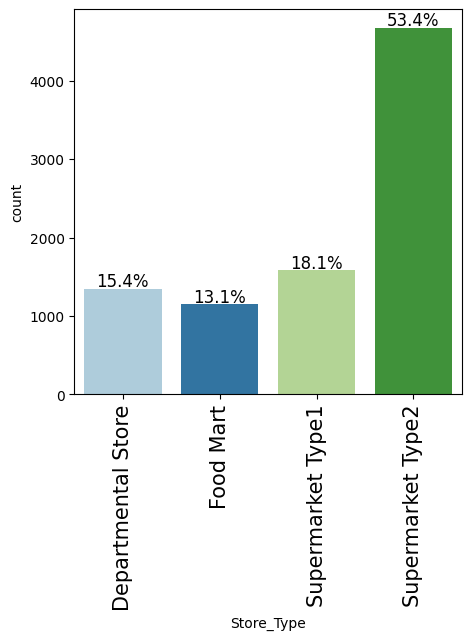

In [25]:
labeled_barplot(data, "Store_Type", perc=True) #Complete the code to plot the labelled barplot of Store_Type with the percentages being displayed

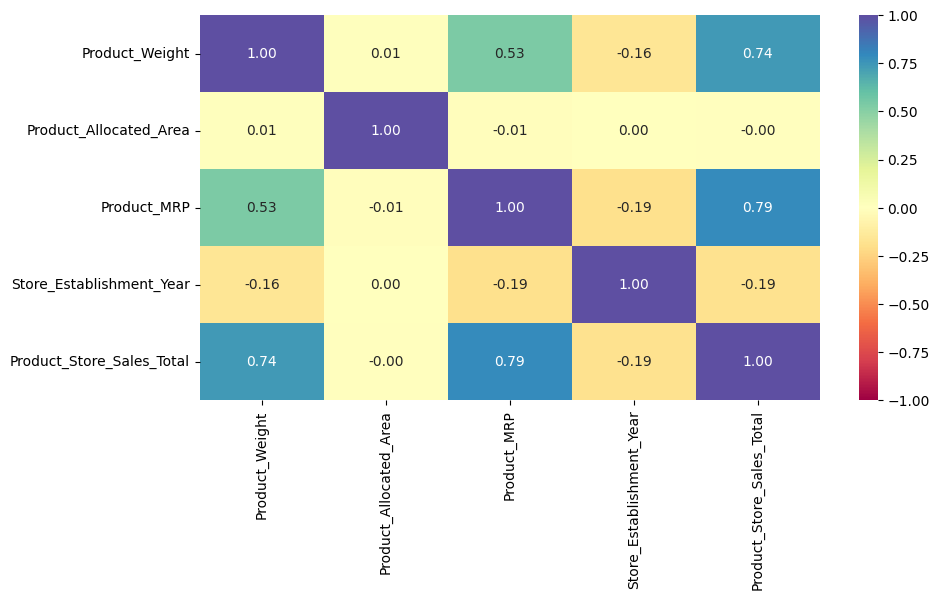

In [26]:
#Bivariate analysis is a statistical analysis technique used to examine the relationship between two variables
#in a dataset in order to understand how one variable is associated with, influences, or varies with another.
# Select numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Plot correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral"
)
plt.show()


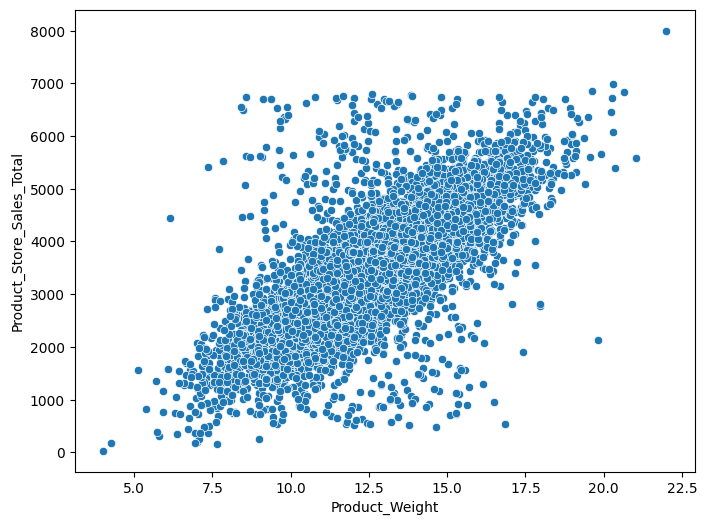

In [27]:
# Let's check the distribution of our target variable i.e Product_Store_Sales_Total with keyboardarrowdown the numeric columns
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Weight, y=data.Product_Store_Sales_Total)
plt.show()

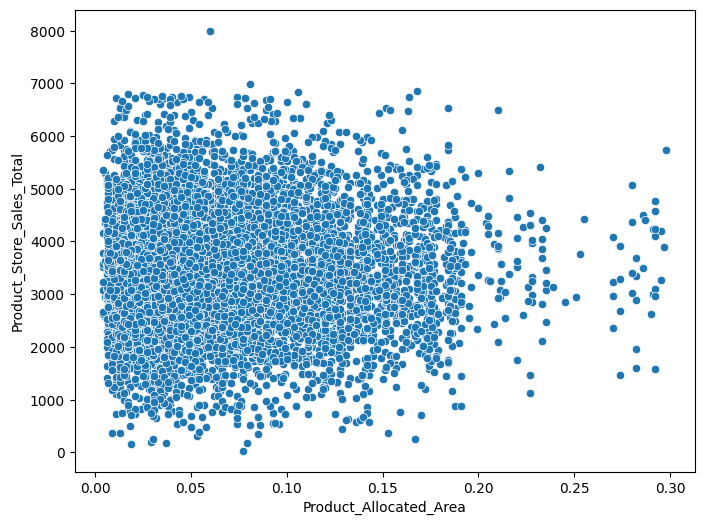

In [28]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_Allocated_Area, y=data.Product_Store_Sales_Total) #Complete the code to plot a scatterplot of Product_Allocat
plt.show()

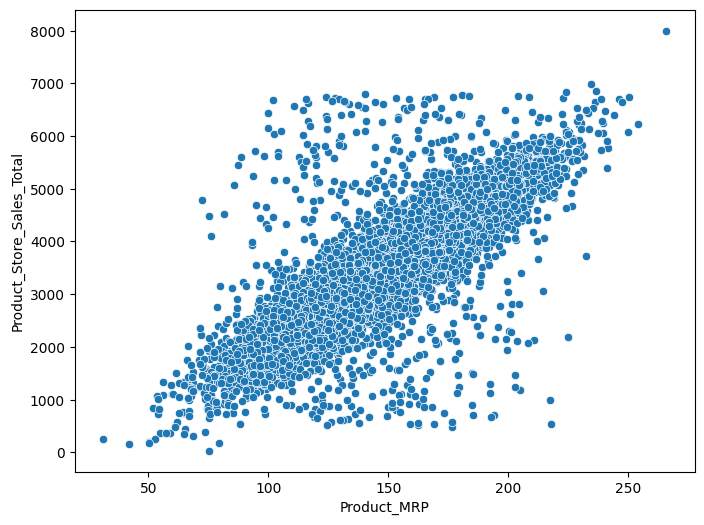

In [29]:
plt.figure(figsize=[8, 6])
sns.scatterplot(x=data.Product_MRP, y=data.Product_Store_Sales_Total) #Complete the code to plot a scatterplot of Product_MRP and Product_St
plt.show()

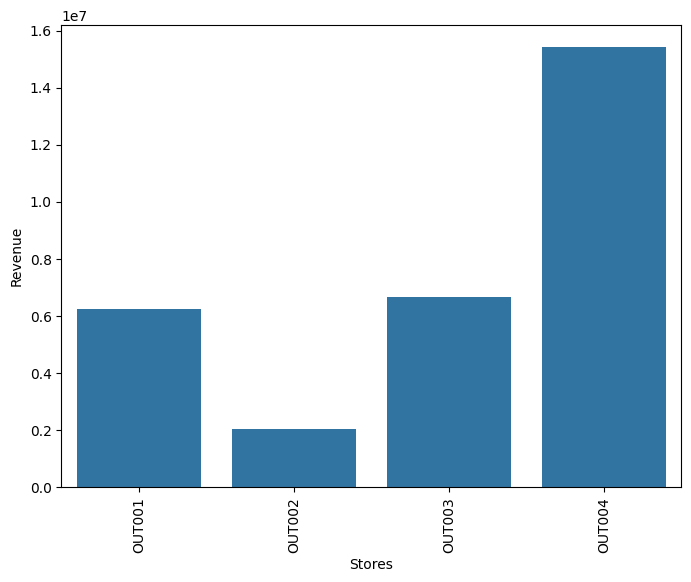

In [30]:
df_store_revenue = data.groupby(["Store_Id"], as_index=False)[
"Product_Store_Sales_Total"
].sum() #Complete the code to perform a groupby on Store_Id and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
r = sns.barplot(
x=df_store_revenue.Store_Id, y=df_store_revenue.Product_Store_Sales_Total
)
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.show()

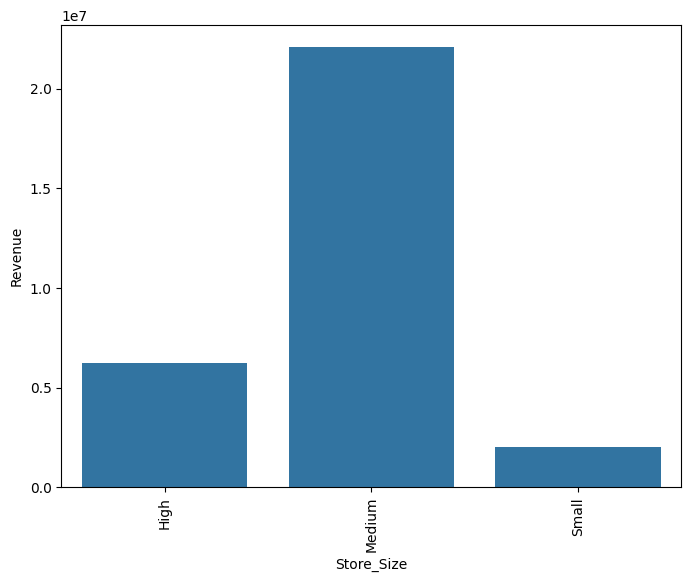

In [31]:
df_revenue3 = data.groupby(["Store_Size"], as_index=False)[
"Product_Store_Sales_Total"
].sum() #Complete the code to perform a groupby on Store_Size and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
c = sns.barplot(x=df_revenue3.Store_Size, y=df_revenue3.Product_Store_Sales_Total)
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.show()

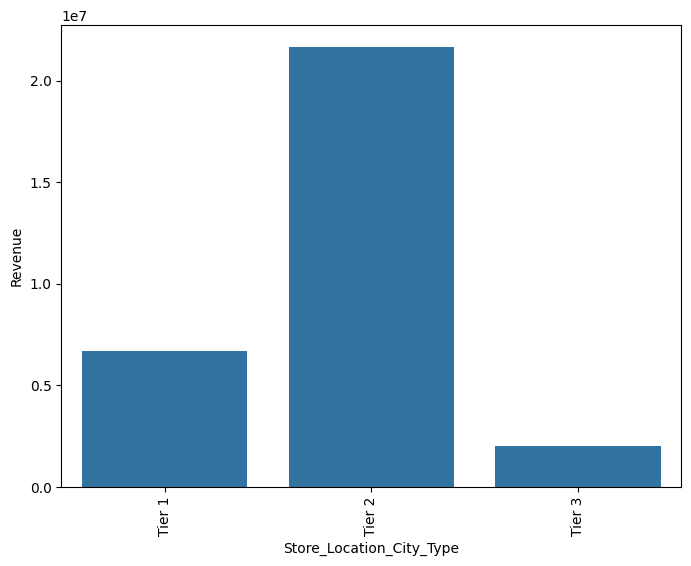

In [32]:
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index=False)["Product_Store_Sales_Total"].sum() #Complete the code to perform a groupby on Store_Location_City_Type and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
d = sns.barplot(
x=df_revenue4.Store_Location_City_Type, y=df_revenue4.Product_Store_Sales_Total
)
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.show()

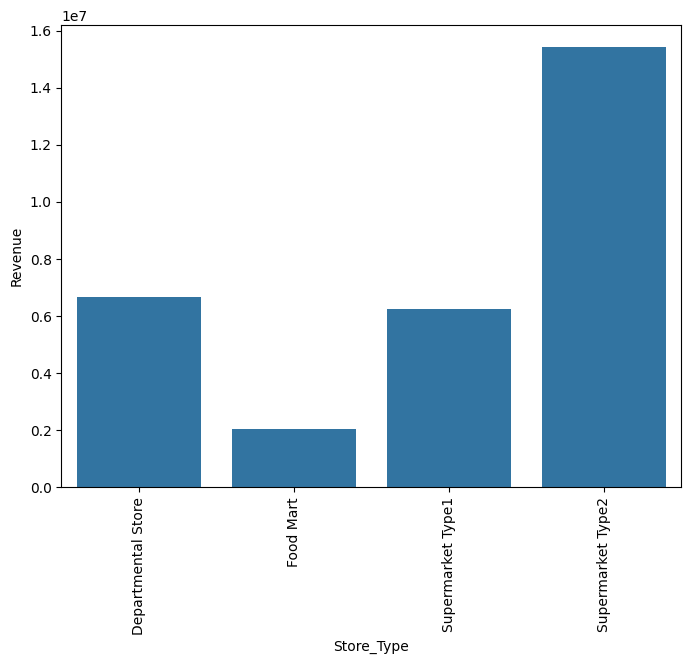

In [33]:
df_revenue5 = data.groupby(["Store_Type"], as_index=False)["Product_Store_Sales_Total"].sum() #Complete the code to perform a groupby on Store_Type and select Product_Store_Sales_Total
plt.figure(figsize=[8, 6])
plt.xticks(rotation=90)
e = sns.barplot(x=df_revenue5.Store_Type, y=df_revenue5.Product_Store_Sales_Total)
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.show()

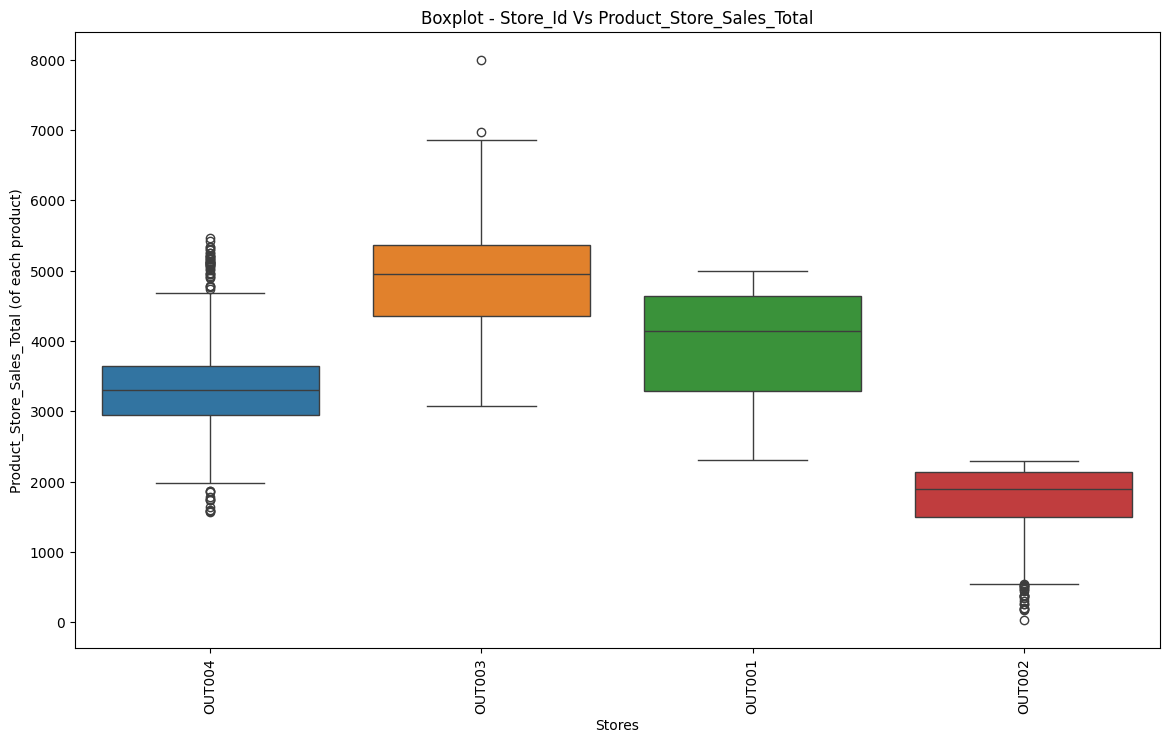

In [34]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=data, x="Store_Id", y="Product_Store_Sales_Total", hue = "Store_Id")
plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

In [35]:
plt.figure(figsize=[14,8])
sns.boxplot(data = data, x ="Store_Size", y ="Product_Store_Sales_Total", hue ="Store_Size")#Complet the code to plot the boxplot with x
plt.xticks(rotation=90)plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")
plt.show()

SyntaxError: invalid syntax (3579904968.py, line 3)

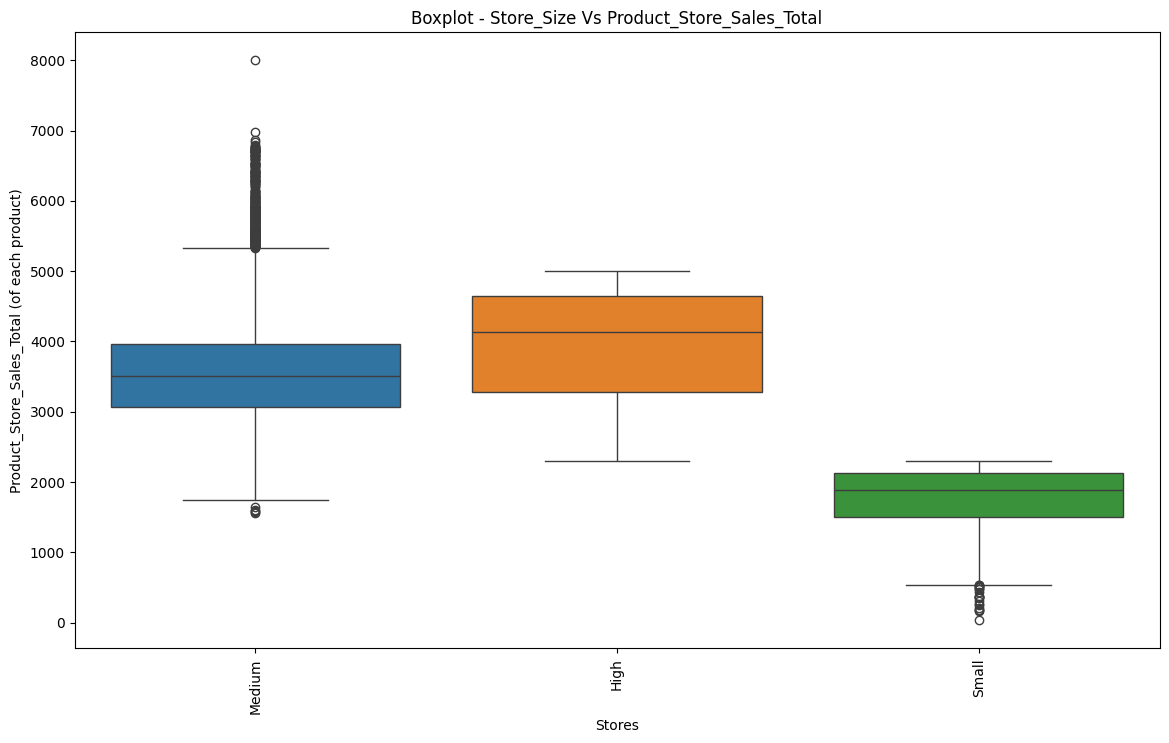

In [36]:
plt.figure(figsize=(14, 8))

sns.boxplot(
    data=data,
    x="Store_Size",
    y="Product_Store_Sales_Total",
    hue="Store_Size"
)

plt.xticks(rotation=90)
plt.title("Boxplot - Store_Size Vs Product_Store_Sales_Total")
plt.xlabel("Stores")
plt.ylabel("Product_Store_Sales_Total (of each product)")

plt.show()


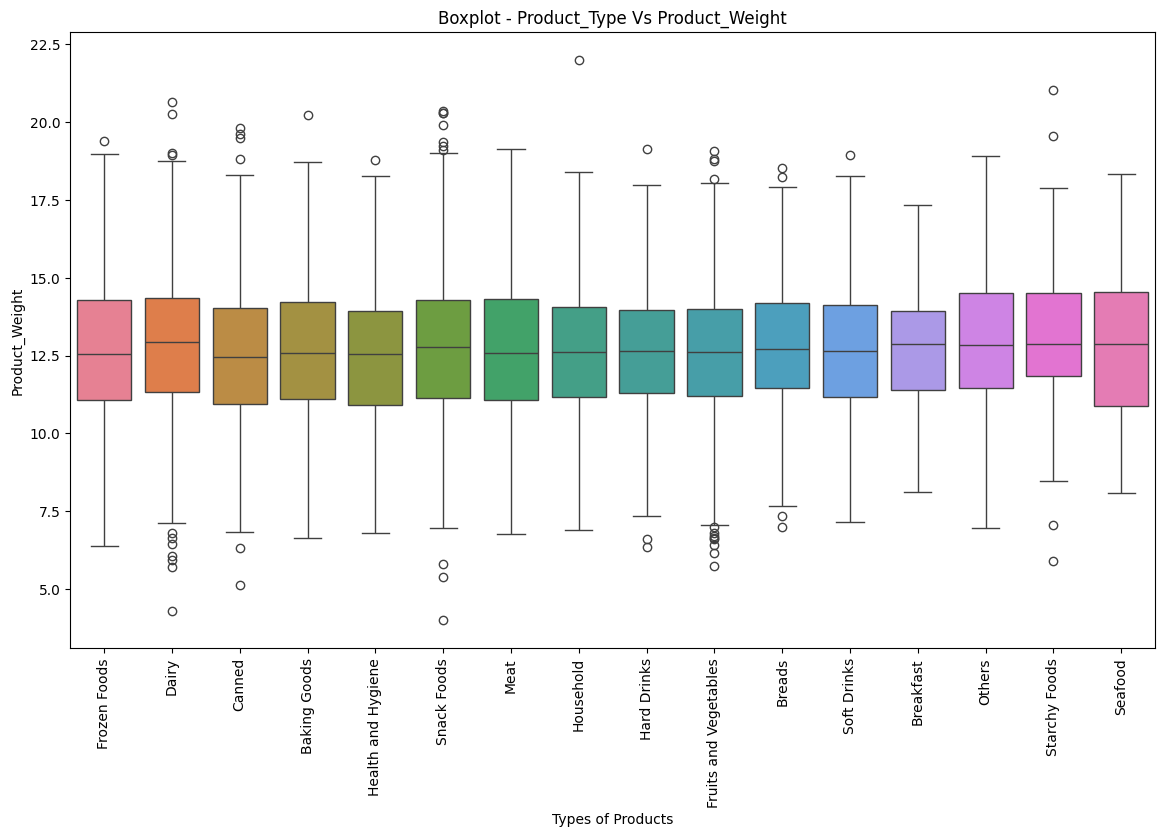

In [37]:
#Let's now try to find out some relationship between the other columns
plt.figure(figsize=[
14
,
8
])
sns.boxplot(data = data, x =
"Product_Type"
, y =
"Product_Weight"
, hue =
"Product_Type"
)
#Complete the code to plot the boxplot with x as P
r
plt.xticks(rotation=
90
)
plt.title(
"Boxplot - Product_Type Vs Product_Weight"
)
plt.xlabel(
"Types of Products"
)
plt.ylabel(
"Product_Weight"
)
plt.show()

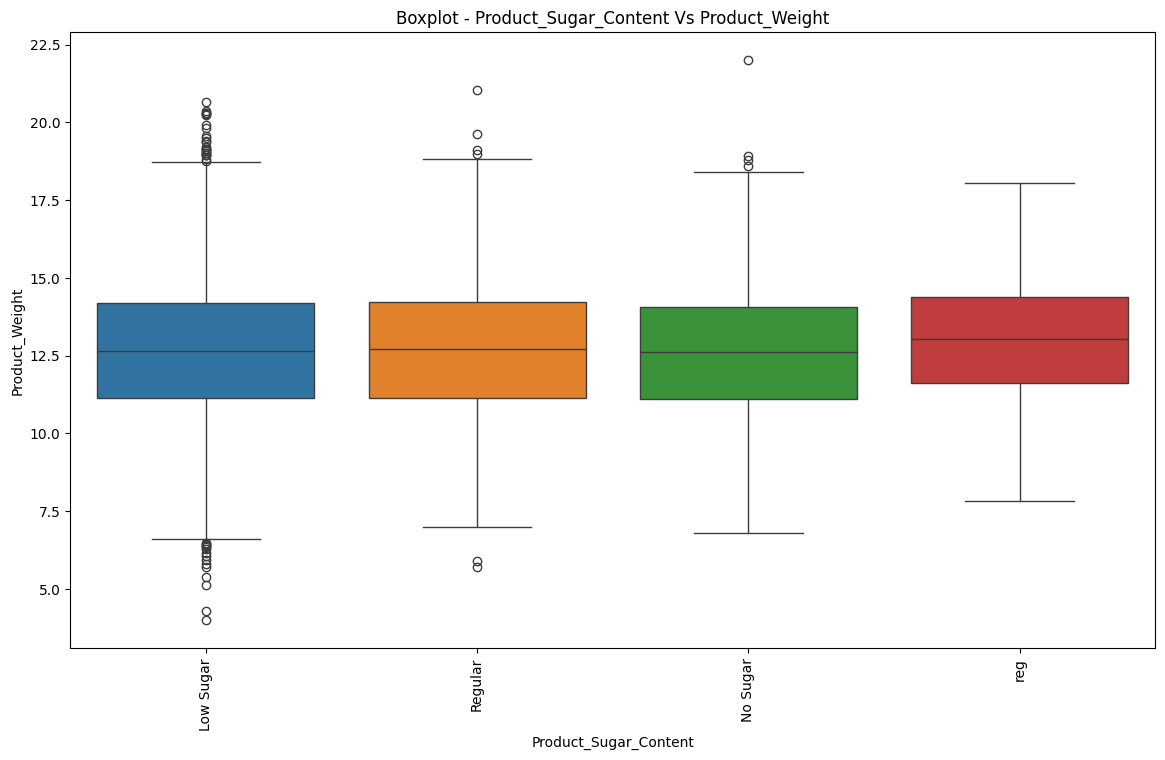

In [39]:
plt.figure(figsize=(14, 8))

sns.boxplot(
    data=data,
    x="Product_Sugar_Content",
    y="Product_Weight",
    hue="Product_Sugar_Content"
)

plt.xticks(rotation=90)
plt.title("Boxplot - Product_Sugar_Content Vs Product_Weight")
plt.xlabel("Product_Sugar_Content")
plt.ylabel("Product_Weight")

plt.show()


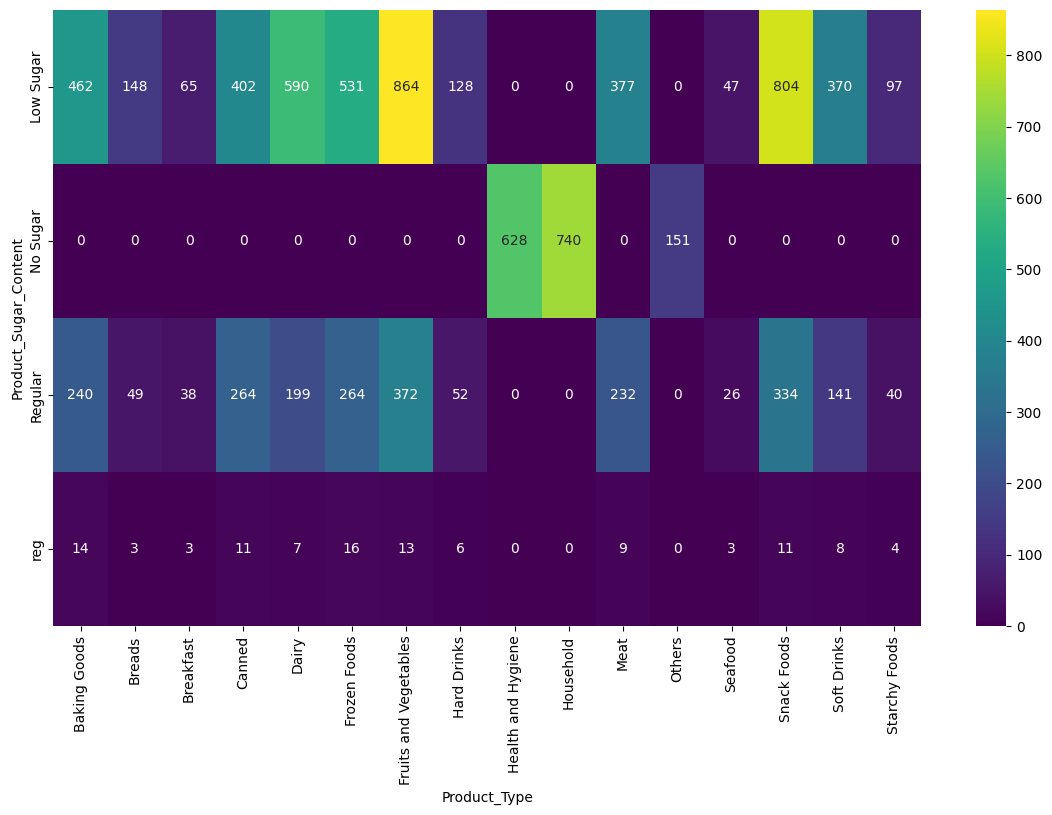

In [40]:
# Let's analyze the sugar content of different product types
plt.figure(figsize=(14, 8))

sns.heatmap(
    pd.crosstab(
        data["Product_Sugar_Content"],
        data["Product_Type"]
    ),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")

plt.show()


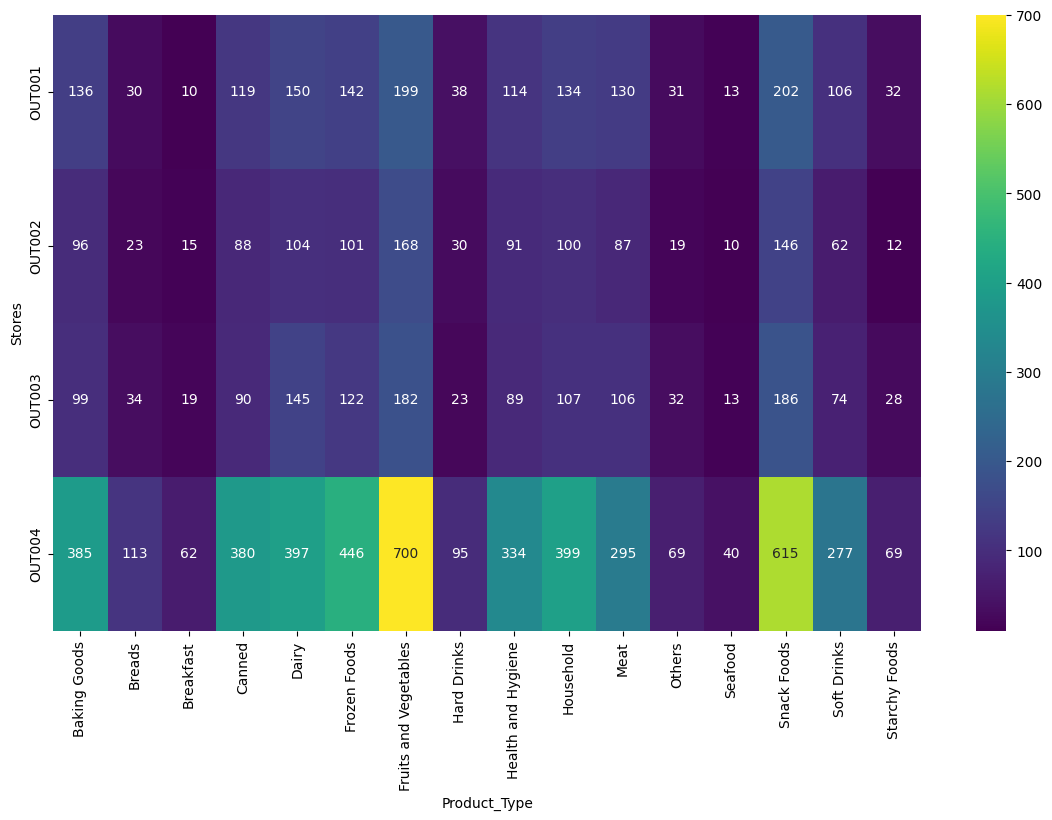

In [41]:
# Let's find out how many items of each product type have been sold in each store
plt.figure(figsize=(14, 8))

sns.heatmap(
    pd.crosstab(
        data["Store_Id"],
        data["Product_Type"]
    ),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Stores")
plt.xlabel("Product_Type")

plt.show()


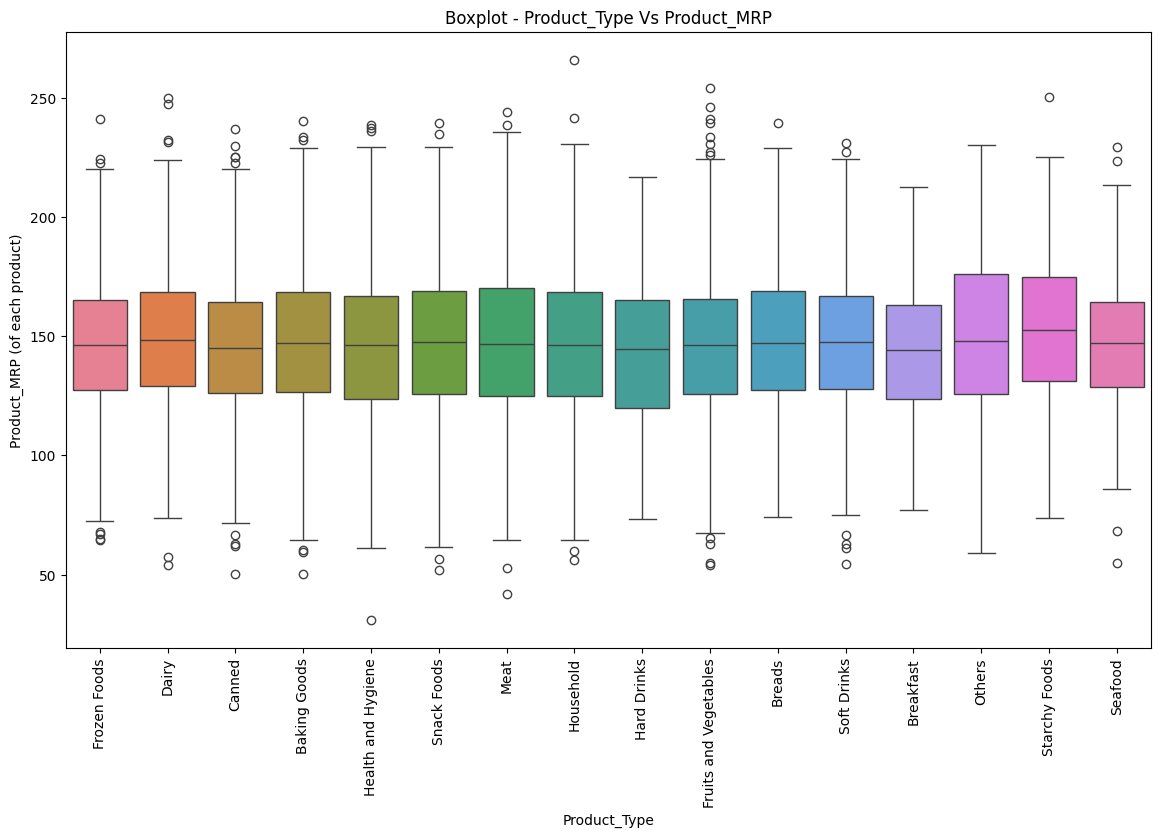

In [42]:
# Different product types have different prices – analyze the trend
plt.figure(figsize=(14, 8))

sns.boxplot(
    data=data,
    x="Product_Type",
    y="Product_MRP",
    hue="Product_Type"
)

plt.xticks(rotation=90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product_Type")
plt.ylabel("Product_MRP (of each product)")

plt.show()


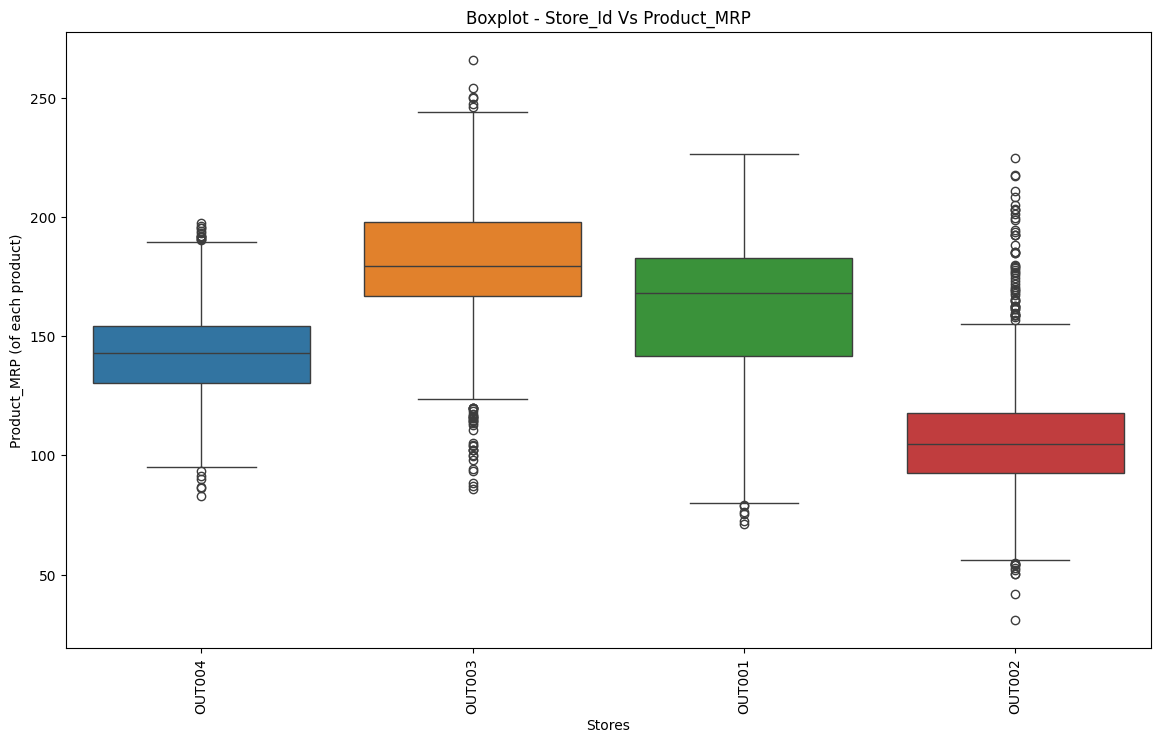

In [43]:
# Let's find out how Product_MRP varies across different stores
plt.figure(figsize=(14, 8))

sns.boxplot(
    data=data,
    x="Store_Id",
    y="Product_MRP",
    hue="Store_Id"
)

plt.xticks(rotation=90)
plt.title("Boxplot - Store_Id Vs Product_MRP")
plt.xlabel("Stores")
plt.ylabel("Product_MRP (of each product)")

plt.show()


In [44]:
#Let's delve deeper and do a detailed analysis of each of the stores.
data.loc[data["Store_Id"] == "OUT001"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1586,1586,NC7187,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1586.0,NaN,NaN,NaN,13.458865,2.064975,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,4,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.0,NaN,NaN,NaN,0.068768,0.047131,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.0,NaN,NaN,NaN,160.514054,30.359059,71.35,141.72,168.32,182.9375,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Observations
#OUT001 is a store of Supermarket Type 1 which is located in a Tier 2 city and has store size as high. It was established in 1987.
#OUT001 has sold products whose MRP range from 71 to 227.

#Snack Foods have been sold the highest number of times in OUT001.
#The revenue generated from each product at OUT001 ranges from 2300 to 5000.



data.loc[data["Store_Id"] =="OUT001","Product_Store_Sales_Total"].sum()  #total sales value
#OUT001 has generated total revenue of 6223113 from the sales of goods

np.float64(6223113.18)

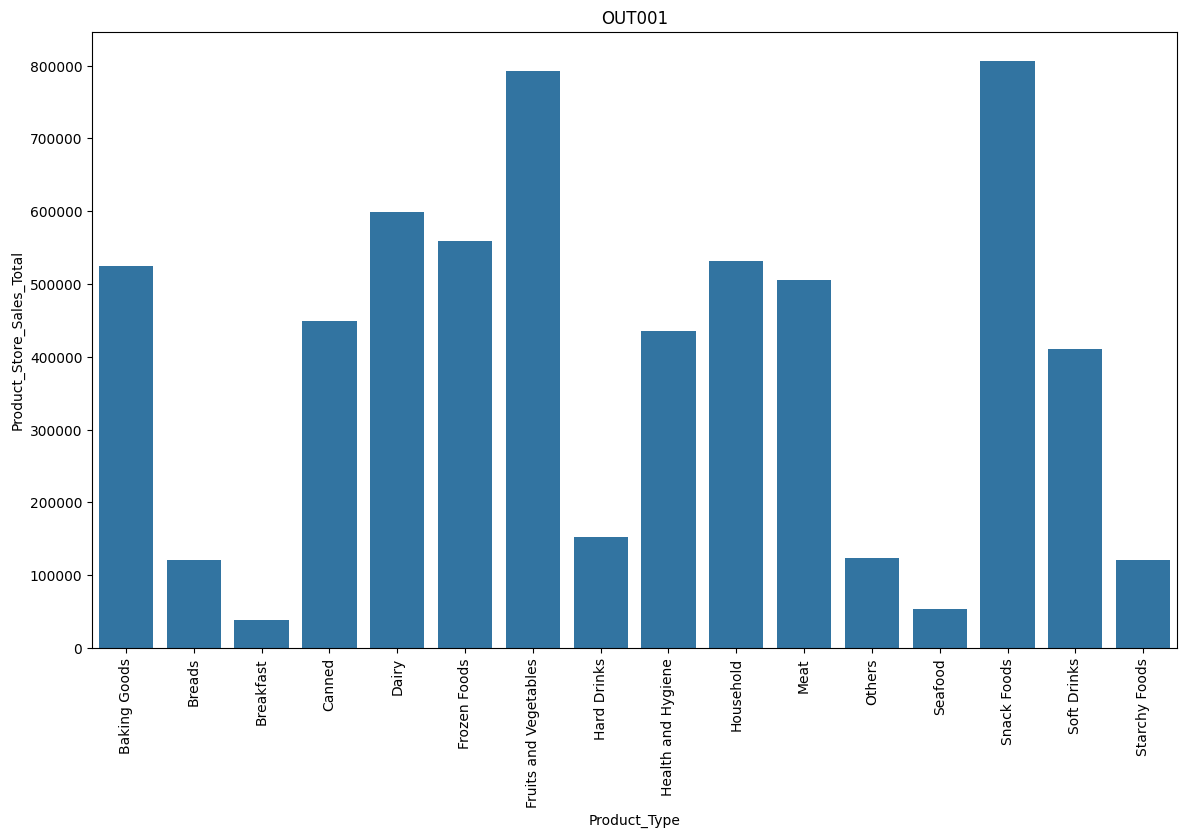

In [46]:
# Aggregate total sales by product type for Store OUT001
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
        .groupby("Product_Type", as_index=False)["Product_Store_Sales_Total"]
        .sum()
)

plt.figure(figsize=(14, 8))

sns.barplot(
    x=df_OUT001["Product_Type"],
    y=df_OUT001["Product_Store_Sales_Total"]
)

plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")

plt.show()


In [47]:
#OUT001 has generated the highest revenue from the sale of fruits and vegetables and snack foods. Both the categories havecontributed around 800000 each.

In [48]:
data.loc[data["Store_Id"] == "OUT002"].describe(include="all").T

SyntaxError: invalid non-printable character U+00A0 (2226871946.py, line 1)

In [49]:
data.loc[data["Store_Id"] == "OUT002"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1152,1152,NC2769,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1152.0,NaN,NaN,NaN,9.911241,1.799846,4.0,8.7675,9.795,10.89,19.82
Product_Sugar_Content,1152,4,Low Sugar,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1152.0,NaN,NaN,NaN,0.067747,0.047567,0.006,0.031,0.0545,0.09525,0.292
Product_Type,1152,16,Fruits and Vegetables,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1152.0,NaN,NaN,NaN,107.080634,24.912333,31.0,92.8275,104.675,117.8175,224.93
Store_Id,1152,1,OUT002,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1152.0,NaN,NaN,NaN,1998.0,0.0,1998.0,1998.0,1998.0,1998.0,1998.0
Store_Size,1152,1,Small,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1152,1,Tier 3,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Observations:
# OUT002 is a Food Mart located in a Tier 3 city with a small store size.
# The store was established in 1998.
# Products sold at OUT002 have MRP values ranging from 31 to 225.
# Fruits and Vegetables are the most frequently sold product category in OUT002.
# Revenue generated per product at OUT002 ranges from 33 to 2300.


In [51]:
data.loc[data["Store_Id"] == "OUT002", "Product_Store_Sales_Total"].sum()

np.float64(2030909.72)

In [52]:
#OUT002 has generated total revenue of 2030910 from the sales of goods.

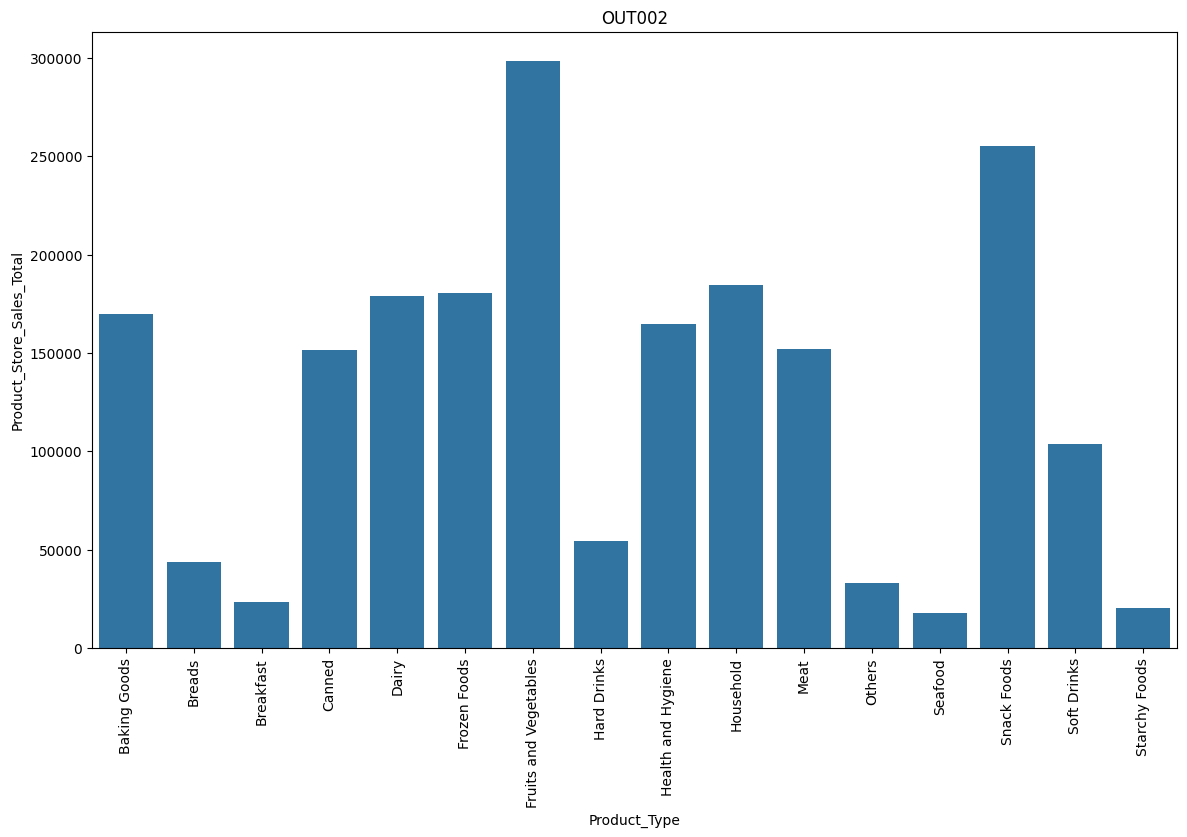

In [53]:
# Aggregate total sales by product type for Store OUT002
df_OUT002 = (
    data.loc[data["Store_Id"] == "OUT002"]
        .groupby("Product_Type", as_index=False)["Product_Store_Sales_Total"]
        .sum()
)

plt.figure(figsize=(14, 8))

sns.barplot(
    x=df_OUT002["Product_Type"],
    y=df_OUT002["Product_Store_Sales_Total"]
)

plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT002")

plt.show()


In [54]:
#OUT002 has generated the highest revenue from the sale of fruits and vegetables (~ 300000) followed by snack foods (~ 250000).

In [55]:
#OUT003

In [56]:
data.loc[data["Store_Id"] == "OUT003"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,1349,1349,NC522,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,1349.0,NaN,NaN,NaN,15.103692,1.893531,7.35,14.02,15.18,16.35,22.0
Product_Sugar_Content,1349,4,Low Sugar,750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1349.0,NaN,NaN,NaN,0.068637,0.048708,0.004,0.031,0.057,0.094,0.298
Product_Type,1349,16,Snack Foods,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1349.0,NaN,NaN,NaN,181.358725,24.796429,85.88,166.92,179.67,198.07,266.0
Store_Id,1349,1,OUT003,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1349.0,NaN,NaN,NaN,1999.0,0.0,1999.0,1999.0,1999.0,1999.0,1999.0
Store_Size,1349,1,Medium,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1349,1,Tier 1,1349,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Observations:
# OUT003 is a Departmental Store located in a Tier 1 city with a medium store size.
# The store was established in 1999.
# Products sold at OUT003 have MRP values ranging from 86 to 266.
# Snack Foods are the most frequently sold product category in OUT003.
# Revenue generated per product at OUT003 ranges from 3070 to 8000.


In [58]:
data.loc[data[
"Store_Id"
] ==
"OUT003"
,
"Product_Store_Sales_Total"
].
sum
()

SyntaxError: invalid syntax (646580223.py, line 7)

In [59]:
data.loc[data["Store_Id"] =="OUT003","Product_Store_Sales_Total"].sum()

np.float64(6673457.57)

In [60]:
#OUT003 has generated total revenue of 6673458 from the sales of goods.

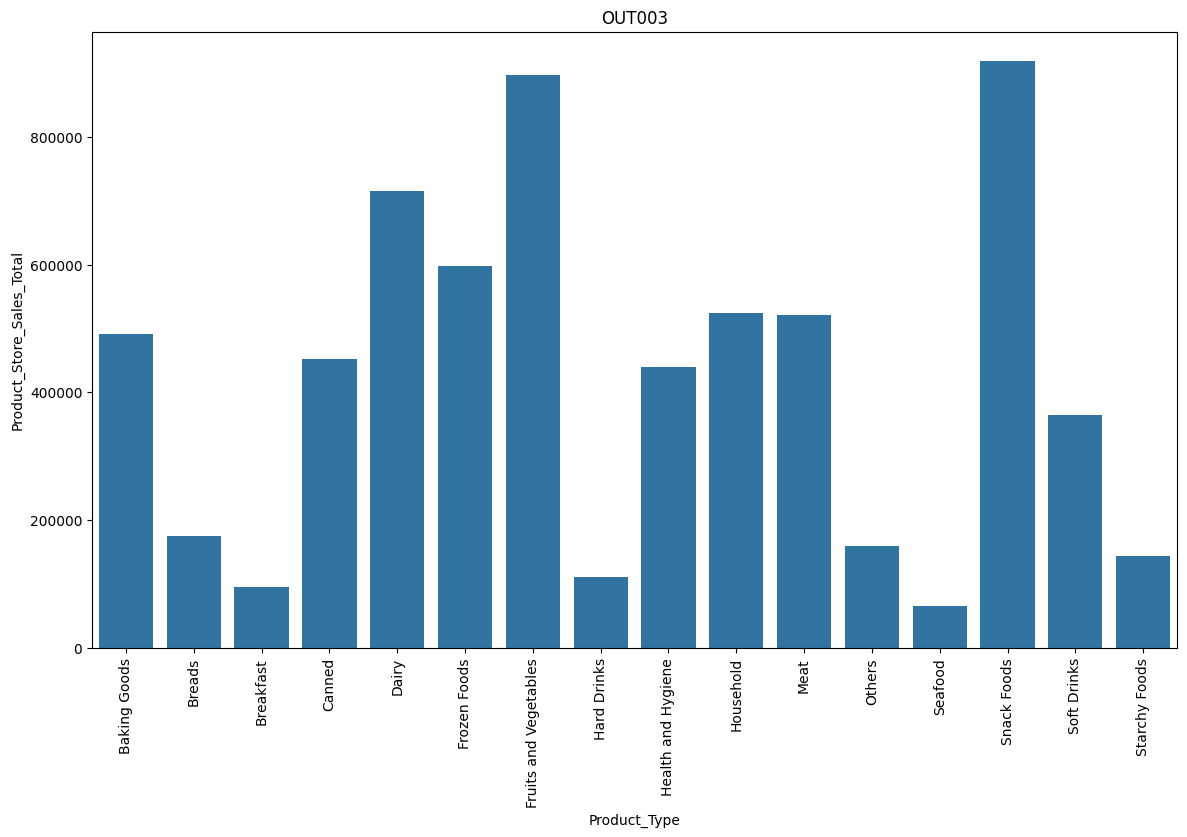

In [61]:
# Aggregate total sales by product type for Store OUT003
df_OUT003 = (
    data.loc[data["Store_Id"] == "OUT003"]
        .groupby("Product_Type", as_index=False)["Product_Store_Sales_Total"]
        .sum()
)

plt.figure(figsize=(14, 8))

sns.barplot(
    x=df_OUT003["Product_Type"],
    y=df_OUT003["Product_Store_Sales_Total"]
)

plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT003")

plt.show()


In [62]:
# Observation:
# OUT003 has generated the highest revenue from the sale of Snack Foods,
# followed by Fruits and Vegetables, with both categories contributing
# approximately 800,000 each to total revenue.


In [63]:
data.loc[data["Store_Id"] == "OUT004"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,4676,4676,NC584,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,4676.0,NaN,NaN,NaN,12.349613,1.428199,7.34,11.37,12.37,13.3025,17.79
Product_Sugar_Content,4676,4,Low Sugar,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,4676.0,NaN,NaN,NaN,0.069092,0.048584,0.004,0.031,0.056,0.097,0.297
Product_Type,4676,16,Fruits and Vegetables,700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,4676.0,NaN,NaN,NaN,142.399709,17.513973,83.04,130.54,142.82,154.1925,197.66
Store_Id,4676,1,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,4676.0,NaN,NaN,NaN,2009.0,0.0,2009.0,2009.0,2009.0,2009.0,2009.0
Store_Size,4676,1,Medium,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,4676,1,Tier 2,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Observations:
# OUT004 is a Supermarket Type2 store located in a Tier 2 city with a medium store size.
# The store was established in 2009.
# Products sold at OUT004 have MRP values ranging from 83 to 198.
# Fruits and Vegetables are the most frequently sold product category in OUT004.
# Revenue generated per product at OUT004 ranges from 1,561 to 5,463.


In [65]:
data.loc[data["Store_Id"] == "OUT004", "Product_Store_Sales_Total"].sum()

np.float64(15427583.43)

In [66]:
#OUT004 has generated total revenue of 15427583 from the sales of goods which is highest among all the 4 stores.

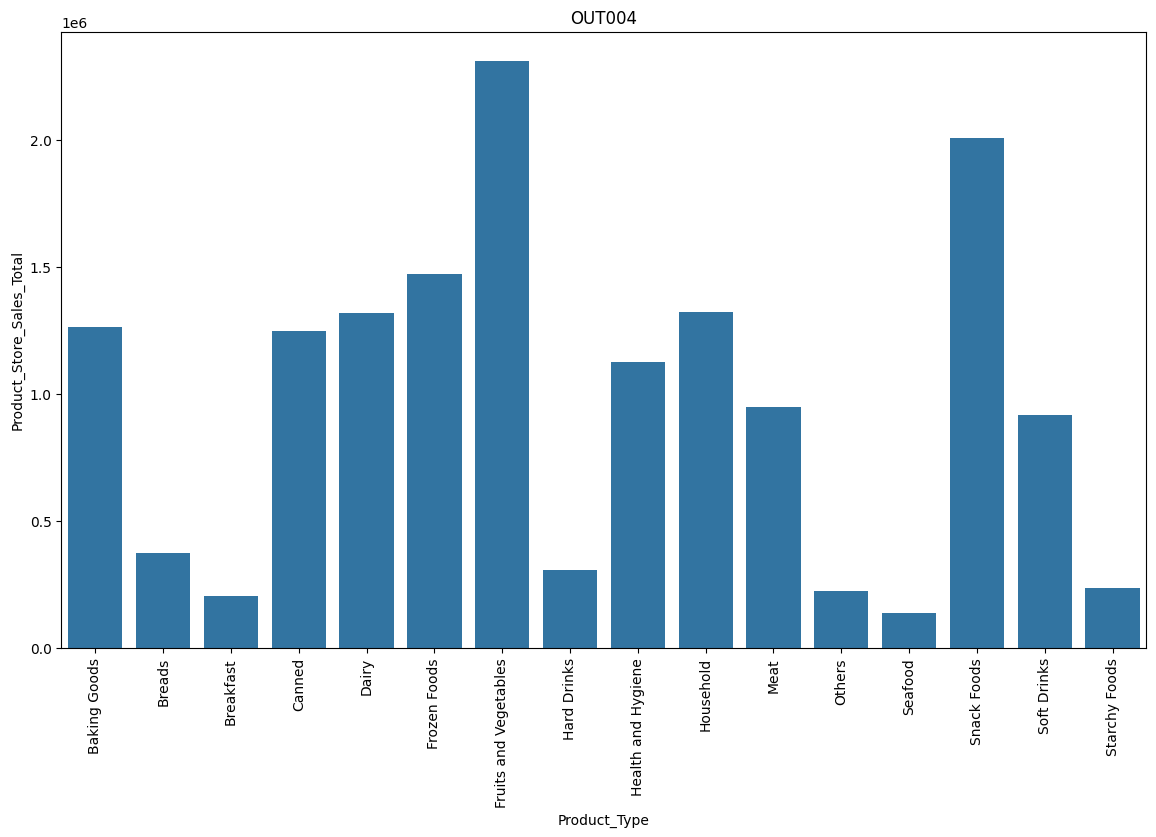

In [67]:
# Aggregate total sales by product type for Store OUT004
df_OUT004 = (
    data.loc[data["Store_Id"] == "OUT004"]
        .groupby("Product_Type", as_index=False)["Product_Store_Sales_Total"]
        .sum()
)

plt.figure(figsize=(14, 8))

sns.barplot(
    x=df_OUT004["Product_Type"],
    y=df_OUT004["Product_Store_Sales_Total"]
)

plt.xticks(rotation=90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT004")

plt.show()


In [68]:
# Observation:
# OUT004 has generated the highest revenue from Fruits and Vegetables
# (approximately 2,500,000), followed by Snack Foods
# (approximately 2,000,000).


In [69]:
# Revenue generated by each store for each product type
df1 = (
    data.groupby(
        ["Product_Type", "Store_Id"],
        as_index=False
    )["Product_Store_Sales_Total"]
    .sum()
)

df1


,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04
1,Baking Goods,OUT002,169860.50
2,Baking Goods,OUT003,491908.20
3,Baking Goods,OUT004,1266086.26
4,Breads,OUT001,121274.09
5,Breads,OUT002,43419.47
6,Breads,OUT003,175391.93
7,Breads,OUT004,374856.75
8,Breakfast,OUT001,38161.10
9,Breakfast,OUT002,23396.10


In [70]:
# Observations:
# Across all product types, OUT004 has generated the highest revenue,
# which is logical since approximately 53% of total products were sold from this store.
# In contrast, OUT002 has generated the lowest revenue across all product categories,
# which is expected given that it is a small store located in a Tier 3 city.


In [71]:
# Revenue generated by each store for different levels of sugar content
df2 = (
    data.groupby(
        ["Product_Sugar_Content", "Store_Id"],
        as_index=False
    )["Product_Store_Sales_Total"]
    .sum()
)

df2


,Product_Sugar_Content,Store_Id,Product_Store_Sales_Total
0,Low Sugar,OUT001,3300834.93
1,Low Sugar,OUT002,1156758.85
2,Low Sugar,OUT003,3706903.24
3,Low Sugar,OUT004,8658908.78
4,No Sugar,OUT001,1090353.78
5,No Sugar,OUT002,382162.19
6,No Sugar,OUT003,1123084.57
7,No Sugar,OUT004,2674343.14
8,Regular,OUT001,1749444.51
9,Regular,OUT002,472112.50


In [72]:
# -------------------------------
# Data Preprocessing
# -------------------------------
# Replacing inconsistent values in the Product_Sugar_Content column
#
# Observation:
# The Product_Sugar_Content column contains three categories:
# - Low Sugar
# - Regular
# - reg
# Since "Regular" and "reg" refer to the same category,
# we standardize the values by replacing "reg" with "Regular".

# Replace 'reg' with 'Regular'
data["Product_Sugar_Content"].replace(
    to_replace=["reg"],
    value=["Regular"],
    inplace=True
)

# Check updated value counts
data["Product_Sugar_Content"].value_counts()


Product_Sugar_Content
Low Sugar    4885
Regular      2359
No Sugar     1519
Name: count, dtype: int64

In [73]:
# Exploring Patterns in Product_IDs
#
# Observation:
# The Product_Id column consists of two alphabetical characters
# followed by a numerical sequence.
#
# Objective:
# To investigate whether the alphanumeric structure of Product_Id
# has any relationship with other variables such as product category,
# pricing (MRP), or sales performance.
#
# This analysis helps determine whether Product_Id contains
# embedded business meaning or should be treated purely
# as an identifier with no predictive value.


In [74]:
# Extract the first two characters from Product_Id
# These characters may represent an embedded product category or code
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()


,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [75]:
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [76]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [77]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

In [78]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

In [79]:
# Select unique Product_Type values for a given Product_Id_char prefix
data.loc[
    data["Product_Id_char"] == "FD", 
    "Product_Type"
].unique()


array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [80]:
# Store Age
# A store that has been in business for a longer duration may be perceived as more trustworthy,
# while older stores may also face infrastructure challenges if not properly maintained.
# Therefore, calculating store age helps capture the effect of experience and maturity in the model.

data["Store_Age_Years"] = 2025 - data["Store_Establishment_Year"]


In [81]:
data["Store_Age_Years"] = 2025 - data["Store_Establishment_Year"]

In [82]:
# Define perishable product categories
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

# Function to classify products as Perishables or Non Perishables
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"

# Create a new feature indicating whether a product is perishable
data["Product_Type_Category"] = data["Product_Type"].apply(change)


In [83]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


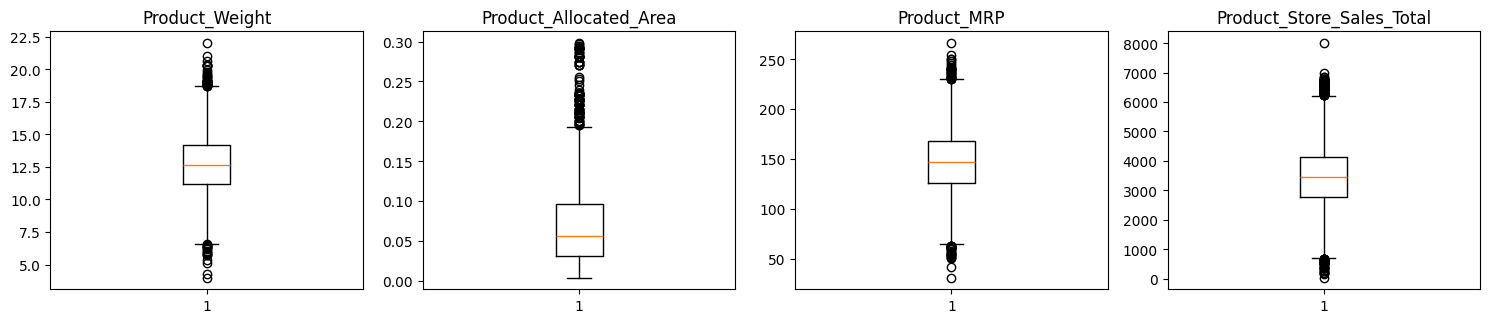

In [84]:
# -----------------------------------
# Outlier Check using Boxplots
# -----------------------------------
# Identify numerical columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Remove year-based variables from outlier analysis
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")

# Plot boxplots for each numeric variable
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.show()


In [85]:
# -----------------------------------
# Data Preparation for Modeling
# -----------------------------------
# Objective:
# The goal is to forecast Product_Store_Sales_Total.
# Prior to model training, unnecessary columns are removed,
# categorical variables are encoded, and the dataset is split
# into training and testing sets to evaluate performance on unseen data.

data.head()


,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


In [86]:
# Remove columns that are not required for modeling
# These columns are identifiers or redundant and do not add predictive value
data = data.drop(
    ["Product_Id", "Product_Type", "Store_Id", "Store_Establishment_Year"],
    axis=1
)

# Check the updated shape of the dataset
data.shape


(8763, 11)

In [87]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,117.08,Medium,Tier 2,Supermarket Type2,2842.40,FD,16,Non Perishables
1,16.54,Low Sugar,0.144,171.43,Medium,Tier 1,Departmental Store,4830.02,FD,26,Perishables
2,14.28,Regular,0.031,162.08,High,Tier 2,Supermarket Type1,4130.16,FD,38,Non Perishables
3,12.10,Low Sugar,0.112,186.31,High,Tier 2,Supermarket Type1,4132.18,FD,38,Non Perishables
4,9.57,No Sugar,0.010,123.67,Small,Tier 3,Food Mart,2279.36,NC,27,Non Perishables


In [88]:
# Separate features and target variable
X = data.drop("Product_Store_Sales_Total", axis=1)  # Feature set
y = data["Product_Store_Sales_Total"]               # Target variable


In [92]:
# Split the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size =0.30,
    random_state=1,
    shuffle=True
)

# Check the shapes of the split datasets
X_train.shape, X_test.shape


((6134, 10), (2629, 10))

In [93]:
# -----------------------------------
# Data Preprocessing Pipeline
# -----------------------------------

# Identify categorical features
categorical_features = data.select_dtypes(
    include=["object", "category"]
).columns.tolist()

categorical_features


['Product_Sugar_Content',
 'Store_Size',
 'Store_Location_City_Type',
 'Store_Type',
 'Product_Id_char',
 'Product_Type_Category']

In [94]:
# Create a preprocessing pipeline for categorical features
preprocessor = make_column_transformer(
    (
        Pipeline(
            [
                ("encoder", OneHotEncoder(handle_unknown="ignore"))
            ]
        ),
        categorical_features
    )
)


In [95]:
# -----------------------------------
# Defining Functions for Model Evaluation
# -----------------------------------
# Objective:
# Fit multiple machine learning models on the training data
# and evaluate their performance on unseen test data.
#
# Approach:
# - Train different regression models.
# - Evaluate performance using R² (coefficient of determination).
# - Improve model performance through hyperparameter tuning.
# - Use GridSearchCV to identify optimal hyperparameter values.
#
# R² (R-square):
# Measures the proportion of variance in the dependent variable
# that is explained by the independent variables.
# A higher R² value indicates better model performance.
#
# To avoid repetitive code, a reusable function is defined
# to compute and return model performance metrics.


In [96]:
# -----------------------------------
# Function to compute Adjusted R-squared
# -----------------------------------
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]  # number of observations
    k = predictors.shape[1]  # number of predictors

    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# -----------------------------------
# Function to evaluate regression model performance
# -----------------------------------
def model_performance_regression(model, predictors, target):
    """
    Function to compute regression model performance metrics.

    Parameters:
    model      : trained regression model
    predictors : independent variables
    target     : dependent variable
    """

    # Predict using the trained model
    pred = model.predict(predictors)

    # Compute evaluation metrics
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mean_absolute_percentage_error(target, pred)

    # Create a DataFrame with performance metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


In [97]:
# -----------------------------------
# Decision Tree Regressor Model
# -----------------------------------

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for preprocessing and modeling
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)

import numpy as np
import pandas as pd

# -----------------------------------
# Check for non-numeric values in numerical columns
# -----------------------------------
numerical_features = [
    "Product_Weight",
    "Product_Allocated_Area",
    "Product_MRP"
]

for col in numerical_features:
    non_numeric_count = pd.to_numeric(
        X_train[col], errors="coerce"
    ).isnull().sum()

    if non_numeric_count > 0:
        print(
            f"Column '{col}' in X_train contains {non_numeric_count} non-numeric values."
        )
    else:
        print(
            f"Column '{col}' in X_train contains no non-numeric values."
        )

# -----------------------------------
# Helper functions for model evaluation
# -----------------------------------
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mean_absolute_percentage_error(target, pred)

    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

# -----------------------------------
# Define features for preprocessing
# -----------------------------------
numerical_features = [
    "Product_Weight",
    "Product_Allocated_Area",
    "Product_MRP"
]

categorical_features = [
    "Product_Sugar_Content",
    "Store_Size",
    "Store_Location_City_Type",
    "Store_Type"
]

# Create preprocessing pipeline
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features)
)

# -----------------------------------
# Train Decision Tree Regressor
# -----------------------------------
dtree = DecisionTreeRegressor(random_state=1)

dtree_pipeline = make_pipeline(
    preprocessor,
    dtree
)

dtree_pipeline.fit(X_train, y_train)

# -----------------------------------
# Evaluate Decision Tree Model
# -----------------------------------
print("\nDecision Tree Regressor - Model Performance on Training Set:")
print(model_performance_regression(dtree_pipeline, X_train, y_train))

print("\nDecision Tree Regressor - Model Performance on Test Set:")
print(model_performance_regression(dtree_pipeline, X_test, y_test))


Column 'Product_Weight' in X_train contains no non-numeric values.
Column 'Product_Allocated_Area' in X_train contains no non-numeric values.
Column 'Product_MRP' in X_train contains no non-numeric values.

Decision Tree Regressor - Model Performance on Training Set:
   RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0

Decision Tree Regressor - Model Performance on Test Set:
        RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  359.44104  123.382385     0.8871        0.886668  0.052663


In [98]:
# -----------------------------------
# Evaluate Decision Tree Model on Training Data
# -----------------------------------

# Compute training performance metrics
dtree_model_train_perf = model_performance_regression(
    dtree_pipeline, X_train, y_train
)

dtree_model_train_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.0,0.0,1.0,1.0,0.0


In [99]:
# -----------------------------------
# Uncomment the below snippet of code if decision
# tree regressor is to be used
# -----------------------------------
# dtree_model_test_perf = model_performance_regression(dtree, X_test, y_test)
# dtree_model_test_perf


# -----------------------------------
# Re-define helper functions for model evaluation
# (if not already defined in this session)
# It's safer to include them for robustness if the
# environment resets
# -----------------------------------
import numpy as np
import pandas as pd

from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)


def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check
    regression model performance

    model      : regressor
    predictors : independent variables
    target     : dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # to compute R-squared
    r2 = r2_score(target, pred)

    # to compute adjusted R-squared
    adjr2 = adj_r2_score(predictors, target, pred)

    # to compute RMSE
    rmse = np.sqrt(mean_squared_error(target, pred))

    # to compute MAE
    mae = mean_absolute_error(target, pred)

    # to compute MAPE
    mape = mean_absolute_percentage_error(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


# -----------------------------------
# Uncomment the below snippet of code if decision
# tree regressor is to be used
# -----------------------------------
dtree_model_test_perf = model_performance_regression(
    dtree_pipeline, X_test, y_test
)

# Use dtree_pipeline as it's the fitted model
dtree_model_test_perf


# -----------------------------------
# XGBoost Regressor
# -----------------------------------

# Uncomment the below snippet of code if xgboost
# regressor is to be used
# xgb_estimator = XGBRegressor(random_state=1)
# xgb_estimator = make_pipeline(preprocessor, xgb_estimator)
# xgb_estimator.fit(X_train, y_train)

from xgboost import XGBRegressor

# Define the model
xgb_estimator = XGBRegressor(
    random_state=1,
    verbosity=0,
)

# Create pipeline with preprocessing
xgb_pipeline = make_pipeline(
    preprocessor,
    xgb_estimator,
)

# Fit the model
xgb_pipeline.fit(X_train, y_train)


,steps,"[('columntransformer', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [100]:
# dtree_model_test_perf = model_performance_regression(dtree, X_test, y_test)
# dtree_model_test_perf

# Re-define helper functions for model evaluation
# (if not already defined in this session)
# It's safer to include them for robustness if the environment resets

import numpy as np
import pandas as pd

from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
)


def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check
    regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # to compute R-squared
    r2 = r2_score(target, pred)

    # to compute adjusted R-squared
    adjr2 = adj_r2_score(predictors, target, pred)

    # to compute RMSE
    rmse = np.sqrt(mean_squared_error(target, pred))

    # to compute MAE
    mae = mean_absolute_error(target, pred)

    # to compute MAPE
    mape = mean_absolute_percentage_error(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf


# Uncomment the below snippet of code if decision
# tree regressor is to be used
dtree_model_test_perf = model_performance_regression(
    dtree_pipeline, X_test, y_test
)

# Use dtree_pipeline as it's the fitted model
dtree_model_test_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,359.44104,123.382385,0.8871,0.886668,0.052663


In [101]:
# -----------------------------------
# XGBoost Regressor
# -----------------------------------

# Uncomment the below snippet of code if xgboost regressor is to be used
# xgb_estimator = XGBRegressor(random_state=1)
# xgb_estimator = make_pipeline(preprocessor, xgb_estimator)
# xgb_estimator.fit(X_train, y_train)

from xgboost import XGBRegressor

# Define the model
xgb_estimator = XGBRegressor(
    random_state=1,
    verbosity=0
)

# Create pipeline with preprocessing
xgb_pipeline = make_pipeline(
    preprocessor,
    xgb_estimator
)

# Fit the model
xgb_pipeline.fit(X_train, y_train)


# -----------------------------------
# Evaluate the model
# -----------------------------------

print("\nXGBoost Regressor - Model Performance on Training Set:")
print(model_performance_regression(xgb_pipeline, X_train, y_train))

print("\nXGBoost Regressor - Model Performance on Test Set:")
print(model_performance_regression(xgb_pipeline, X_test, y_test))



XGBoost Regressor - Model Performance on Training Set:
         RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  127.766962  58.911644   0.985573        0.985549  0.019671

XGBoost Regressor - Model Performance on Test Set:
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  309.775996  134.783796   0.916144        0.915823  0.056372


In [102]:
data["Product_Store_Sales_Total"].mean()


np.float64(3464.003640305831)

In [103]:
# Check XGBoost regressor performance on the training set
xgb_estimator_model_train_perf = model_performance_regression(
    xgb_pipeline, X_train, y_train
)

xgb_estimator_model_train_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,127.766962,58.911644,0.985573,0.985549,0.019671


In [104]:
# Check XGBoost regressor performance on the test set
xgb_estimator_model_test_perf = model_performance_regression(
    xgb_pipeline, X_test, y_test
)

xgb_estimator_model_test_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,309.775996,134.783796,0.916144,0.915823,0.056372


In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Choose the type of regressor
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Create pipeline with preprocessing
dtree_tuned = make_pipeline(preprocessor, dtree_tuned)

# Grid of hyperparameters to tune
parameters = {
    "decisiontreeregressor__max_depth": list(np.arange(2, 6)),
    "decisiontreeregressor__min_samples_leaf": [1, 3, 5],
    "decisiontreeregressor__max_leaf_nodes": [2, 3, 5, 10, 15],
    "decisiontreeregressor__min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Run GridSearchCV
grid_obj = GridSearchCV(
    dtree_tuned,
    parameters,
    scoring="r2",
    cv=3,
    n_jobs=-1
)

grid_obj = grid_obj.fit(X_train, y_train)

# Get the best estimator
dtree_tuned = grid_obj.best_estimator_

# Fit the best estimator
dtree_tuned.fit(X_train, y_train)

# Evaluate performance
print("\nTuned Decision Tree - Model Performance on Training Set:")
print(model_performance_regression(dtree_tuned, X_train, y_train))

print("\nTuned Decision Tree - Model Performance on Test Set:")
print(model_performance_regression(dtree_tuned, X_test, y_test))



Tuned Decision Tree - Model Performance on Training Set:
         RMSE         MAE  R-squared  Adj. R-squared     MAPE
0  390.807182  263.756623   0.865019        0.864799  0.09531

Tuned Decision Tree - Model Performance on Test Set:
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  418.906939  277.126837   0.846653        0.846067  0.113007


In [106]:
# ================================
# Hyperparameter Tuning – Bagging Regressor
# ================================

# Choose the type of regressor
bagging_estimator_tuned = BaggingRegressor(random_state=1)

# Create a pipeline with preprocessing and the Bagging Regressor
bagging_estimator_tuned = make_pipeline(preprocessor, bagging_estimator_tuned)

# Grid of hyperparameters to tune
parameters = {
    "baggingregressor__max_samples": [0.5, 0.7, 1.0],    # Fraction of samples for each base estimator
    "baggingregressor__max_features": [0.5, 0.7, 1.0],  # Fraction of features for each base estimator
    "baggingregressor__n_estimators": [10, 50, 100],    # Number of base estimators
}

# Run GridSearchCV
grid_obj = GridSearchCV(
    bagging_estimator_tuned,
    parameters,
    scoring="r2",
    cv=3,
    n_jobs=-1
)

# Fit GridSearchCV on training data
grid_obj = grid_obj.fit(X_train, y_train)

# Select the best estimator
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best estimator on the training data
bagging_estimator_tuned.fit(X_train, y_train)

# ================================
# Evaluate model performance
# ================================

# Performance on training set
print("\nTuned Bagging Regressor - Model Performance on Training Set:")
print(model_performance_regression(bagging_estimator_tuned, X_train, y_train))

# Performance on test set
print("\nTuned Bagging Regressor - Model Performance on Test Set:")
print(model_performance_regression(bagging_estimator_tuned, X_test, y_test))



Tuned Bagging Regressor - Model Performance on Training Set:
         RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  169.596607  64.404086    0.97458        0.974538  0.022975

Tuned Bagging Regressor - Model Performance on Test Set:
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  294.038734  111.894844   0.924447        0.924159  0.050528


In [107]:
# ---------------------------------------------------
# STEP 1: Choose the base model
# ---------------------------------------------------
# RandomForestRegressor builds multiple decision trees
# and averages their predictions to improve accuracy
# and reduce overfitting.

rf_tuned = RandomForestRegressor(random_state=1)

# ---------------------------------------------------
# STEP 2: Combine preprocessing and model into a pipeline
# ---------------------------------------------------
# This ensures that data preprocessing (scaling, encoding)
# is applied consistently during training and validation.

rf_tuned = make_pipeline(preprocessor, rf_tuned)

# ---------------------------------------------------
# STEP 3: Define the hyperparameter grid to tune
# ---------------------------------------------------
# These parameters control how the forest is built.

parameters = {
    # Maximum depth of each tree
    # Controls model complexity
    "randomforestregressor__max_depth": [5, 10, 15],

    # Number of features considered at each split
    # 'sqrt' reduces correlation between trees
    "randomforestregressor__max_features": ['auto', 'sqrt'],

    # Number of trees in the forest
    # More trees usually improve performance but increase computation
    "randomforestregressor__n_estimators": [50, 100, 200],
}

# ---------------------------------------------------
# STEP 4: Perform Grid Search with Cross-Validation
# ---------------------------------------------------
# GridSearchCV tries all parameter combinations,
# evaluates them using cross-validation,
# and selects the best one based on R² score.

grid_obj = GridSearchCV(
    rf_tuned,
    parameters,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

grid_obj = grid_obj.fit(X_train, y_train)

# ---------------------------------------------------
# STEP 5: Retrieve the best tuned model
# ---------------------------------------------------
# best_estimator_ gives the model with optimal parameters.

rf_tuned = grid_obj.best_estimator_

# ---------------------------------------------------
# STEP 6: Fit the tuned model on the full training data
# ---------------------------------------------------
rf_tuned.fit(X_train, y_train)

# ---------------------------------------------------
# STEP 7: Evaluate model performance
# ---------------------------------------------------

print("\nTuned Random Forest - Model Performance on Training Set:")
print(model_performance_regression(rf_tuned, X_train, y_train))

print("\nTuned Random Forest - Model Performance on Test Set:")
print(model_performance_regression(rf_tuned, X_test, y_test))



Tuned Random Forest - Model Performance on Training Set:
         RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  125.125394  61.302641   0.986163        0.986141  0.022221

Tuned Random Forest - Model Performance on Test Set:
         RMSE         MAE  R-squared  Adj. R-squared      MAPE
0  306.318185  140.711502   0.918005        0.917692  0.061945


In [108]:
# Compare training performance of selected models
models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,              # Decision Tree (base)
        dtree_tuned_model_train_perf.T,        # Decision Tree (tuned)
        xgb_estimator_model_train_perf.T,      # XGBoost (base)
        xgb_estimator_model_train_perf.T       # XGBoost (tuned) – if same, reuse
    ],
    axis=1,
)

# Name the columns (models)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree (Tuned)",
    "XGBoost",
    "XGBoost (Tuned)"
]

print("Training performance comparison:")
models_train_comp_df


NameError: name 'dtree_tuned_model_train_perf' is not defined

In [109]:
dtree_pipeline = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=1))
dtree_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('decisiontreeregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [110]:
dtree_pipeline_model_train_perf = model_performance_regression(dtree_pipeline, X_train, y_train)
xgb_pipeline = make_pipeline(preprocessor, XGBRegressor(random_state=1))
xgb_pipeline.fit(X_train, y_train)

,steps,"[('columntransformer', ...), ('xgbregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [111]:
xgb_pipeline_model_train_perf = model_performance_regression(xgb_pipeline, X_train, y_train)
models_train_comp_df = pd.concat(
[
dtree_pipeline_model_train_perf.T,
dtree_tuned_model_train_perf.T,
xgb_pipeline_model_train_perf.T,
xgb_tuned_model_train_perf.T,
],
axis=1,
)
models_train_comp_df.columns = [
"Decision Tree (Base)",
"Decision Tree (Tuned)",
"XGBoost (Base)",
"XGBoost (Tuned)"
]
print("Training performance comparison:")
models_train_comp_df

NameError: name 'dtree_tuned_model_train_perf' is not defined

NameError: name 'dtree_tuned_model_train_perf' is not defined

In [113]:
# Evaluate XGBoost (Base) model on training data
xgb_pipeline_model_train_perf = model_performance_regression(
    xgb_pipeline, X_train, y_train
)

# ================================
# Training performance comparison
# ================================
models_train_comp_df = pd.concat(
    [
        dtree_pipeline_model_train_perf.T,
        dtree_tuned_model_train_perf.T,
        xgb_pipeline_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree (Base)",
    "Decision Tree (Tuned)",
    "XGBoost (Base)",
    "XGBoost (Tuned)",
]

print("Training performance comparison:")
models_train_comp_df


NameError: name 'dtree_tuned_model_train_perf' is not defined

In [114]:
# Create a folder for storing the files needed for
web app deployment
os.makedirs(
"backend_files"
, exist_ok=
True
)
# Define the file path to save (serialize) the tra
ined model along with the data preprocessing steps
saved_model_path =
"backend_files/xgb_tuned_model.joblib"
#Complete the code to define the name of the model
# Save the best trained model pipeline using jobli
b
joblib.dump(xgb_tuned, saved_model_path)
#Complete the code to pass the variable name of th
e best model
print
(
f
"Model saved successfully at
{saved_model_path}
"
)
Model saved successfully at backend_files/xgb_tuned_model.joblib
# Load the saved model pipeline from the file
saved_model = joblib.load(
"backend_files/xgb_tuned_model.joblib"
)
#Complete the code to define the name of the saved
model
# Confirm the model is loaded
print
(
"Model loaded successfully."
)
Model loaded successfully.

SyntaxError: unterminated string literal (detected at line 21) (2549072823.py, line 21)